# Task B - NAND  

In [68]:
import torch 
import torch.nn as nn 
import matplotlib.pyplot as plt 

In [69]:
x_train = torch.FloatTensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y_train = torch.FloatTensor([[1.0], [1.0], [1.0], [0.0]])

In [70]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def logits(self, x): 
        return self.linear(x)

    def forward(self, x):
        return torch.sigmoid(self.logits(x))
    
    def loss(self, x, y): 
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [71]:
model = Model(2, 1)

In [72]:
learning_rate = 0.015
epochs = 80000

In [73]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [74]:
loss = 0 
losses = []

In [75]:
 for i in range(epochs):
    y_pred = model.forward(x_train)

    loss = model.loss(x_train, y_train)
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    i += 1

## Loss graph

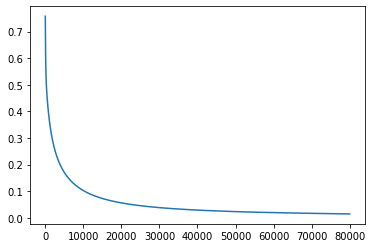

In [76]:
plt.plot(range(epochs), losses)

## Optimization result

In [77]:
W1 = model.linear.weight[0][0]
W2 = model.linear.weight[0][1]
b = model.linear.bias.item()

print(f'W1: {W1}, W2: {W2}, b: {b}, loss: {loss}')

W1: -7.786770820617676, W2: -7.786770820617676, b: 11.852005958557129, loss: 0.01448586955666542


## Optimization graph

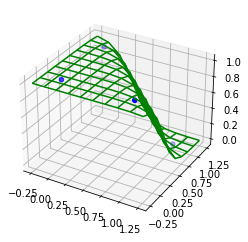

In [81]:
fig = plt.figure('Linear regression: 3D')
plot = fig.add_subplot(111, projection='3d')

# Draws test data (points)
plot.scatter(x_train[:, 0], x_train[:, 1], y_train, color='blue')

# Initializes the x-grids
x1_grid, x2_grid = torch.meshgrid(torch.linspace(-0.25, 1.25, 10), torch.linspace(-0.25, 1.25, 10))

# Initializes the corresponding y-grid
y_grid = torch.empty([10, 10])
for i in range(0, x1_grid.shape[0]):
    for j in range(0, x1_grid.shape[1]):
            x_plot = torch.FloatTensor([[x1_grid[i, j], x2_grid[i, j]]])
            y_grid[i, j] = model.forward(x_plot)


# Draws the optimization 
plot_f = plot.plot_wireframe(x1_grid.detach(), x2_grid.detach(), y_grid.detach(), color='green')